### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

### Load the Data

In [2]:
cohort_path = "../data/3195663216_msprime_sim_cohort.csv"
effects_path = "../data/3195663216_msprime_effect_sizes.csv"

cohort = pd.read_csv(cohort_path)
effects = pd.read_csv(effects_path)

## Cohort

### Data Overview

In [3]:
cohort.head()

individual_id  sex   age  env_index  polygenic_score  quant_trait  \
0              0    0  63.0  -1.629140         0.760770    -0.318469   
1              1    1  67.0  -0.624573         0.519406     0.683869   
2              2    0  59.0  -0.243920         0.816273     1.795897   
3              3    0  41.0   0.771197        -0.721764    -0.526473   
4              4    0  33.0  -1.024086        -0.769897    -0.169940   

   disease_status  disease_prob       PC1        PC2  
0               1      0.387942  2.706997  10.632169  
1               1      0.583642  8.517080 -11.365962  
2               1      0.602745  2.731682  -4.373494  
3               0      0.402481 -2.823508  -3.385728  
4               0      0.177698  2.707803   2.536408

In [4]:
cohort.shape

(10000, 10)

In [5]:
cohort.dtypes

individual_id        int64
sex                  int64
age                float64
env_index          float64
polygenic_score    float64
quant_trait        float64
disease_status       int64
disease_prob       float64
PC1                float64
PC2                float64
dtype: object

In [6]:
cohort.isna().sum()

individual_id      0
sex                0
age                0
env_index          0
polygenic_score    0
quant_trait        0
disease_status     0
disease_prob       0
PC1                0
PC2                0
dtype: int64

In [7]:
cohort.isnull().sum()

individual_id      0
sex                0
age                0
env_index          0
polygenic_score    0
quant_trait        0
disease_status     0
disease_prob       0
PC1                0
PC2                0
dtype: int64

In [8]:
cohort.info()
cohort.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   individual_id    10000 non-null  int64  
 1   sex              10000 non-null  int64  
 2   age              10000 non-null  float64
 3   env_index        10000 non-null  float64
 4   polygenic_score  10000 non-null  float64
 5   quant_trait      10000 non-null  float64
 6   disease_status   10000 non-null  int64  
 7   disease_prob     10000 non-null  float64
 8   PC1              10000 non-null  float64
 9   PC2              10000 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 781.4 KB


individual_id           sex           age     env_index  \
count    10000.00000  10000.000000  10000.000000  10000.000000   
mean      4999.50000      0.494400     45.034500      0.003659   
std       2886.89568      0.499994     14.637101      1.002948   
min          0.00000      0.000000     20.000000     -3.486467   
25%       2499.75000      0.000000     32.000000     -0.665262   
50%       4999.50000      0.000000     45.000000      0.007784   
75%       7499.25000      1.000000     58.000000      0.671783   
max       9999.00000      1.000000     70.000000      4.048420   

       polygenic_score   quant_trait  disease_status  disease_prob  \
count     1.000000e+04  1.000000e+04    10000.000000  10000.000000   
mean     -7.531753e-17 -1.989520e-17        0.495400      0.499984   
std       1.000000e+00  1.000000e+00        0.500004      0.224913   
min      -3.425425e+00 -3.674438e+00        0.000000      0.019687   
25%      -6.886466e-01 -6.673733e-01        0.000000      0.318043   
50%       1.069430e-04 -4.147091e-03        0.000000      0.500888   
75%       6.954927e-01  6.718384e-01        1.000000      0.679591   
max       3.433686e+00  3.676401e+00        1.000000      0.973832   

                PC1           PC2  
count  1.000000e+04  1.000000e+04  
mean  -3.797140e-15  5.741185e-16  
std    8.915065e+00  8.576561e+00  
min   -2.241905e+01 -1.935404e+01  
25%   -6.362309e+00 -5.800355e+00  
50%   -1.984870e-01 -1.473405e+00  
75%    6.361650e+00  3.811644e+00  
max    2.766844e+01  4.090636e+01

In [9]:
cohort.describe().T

count          mean          std        min          25%  \
individual_id    10000.0  4.999500e+03  2886.895680   0.000000  2499.750000   
sex              10000.0  4.944000e-01     0.499994   0.000000     0.000000   
age              10000.0  4.503450e+01    14.637101  20.000000    32.000000   
env_index        10000.0  3.658620e-03     1.002948  -3.486467    -0.665262   
polygenic_score  10000.0 -7.531753e-17     1.000000  -3.425425    -0.688647   
quant_trait      10000.0 -1.989520e-17     1.000000  -3.674438    -0.667373   
disease_status   10000.0  4.954000e-01     0.500004   0.000000     0.000000   
disease_prob     10000.0  4.999840e-01     0.224913   0.019687     0.318043   
PC1              10000.0 -3.797140e-15     8.915065 -22.419049    -6.362309   
PC2              10000.0  5.741185e-16     8.576561 -19.354038    -5.800355   

                         50%          75%          max  
individual_id    4999.500000  7499.250000  9999.000000  
sex                 0.000000     1.000000     1.000000  
age                45.000000    58.000000    70.000000  
env_index           0.007784     0.671783     4.048420  
polygenic_score     0.000107     0.695493     3.433686  
quant_trait        -0.004147     0.671838     3.676401  
disease_status      0.000000     1.000000     1.000000  
disease_prob        0.500888     0.679591     0.973832  
PC1                -0.198487     6.361650    27.668438  
PC2                -1.473405     3.811644    40.906363

### Histogram: Age

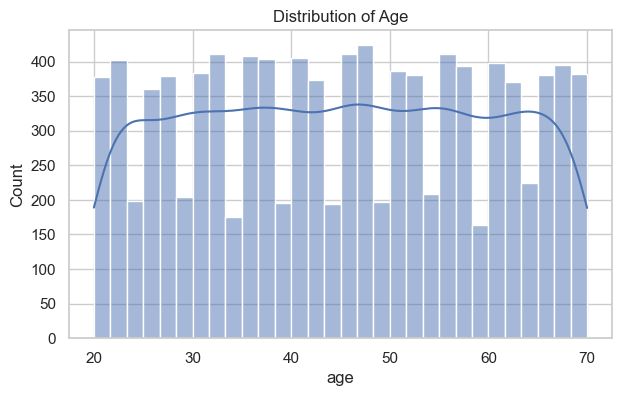

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(cohort["age"], kde=True, bins=30)
plt.title("Distribution of Age")
plt.show()

### Box Plot: Age

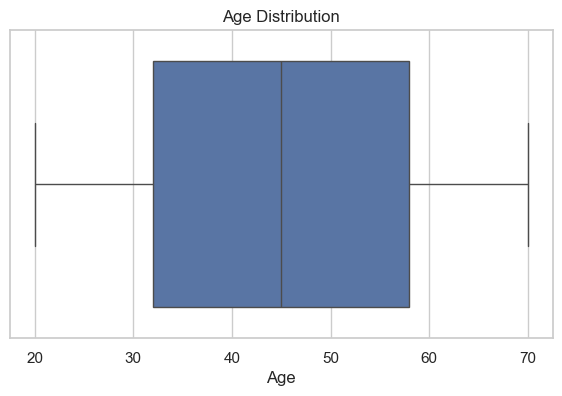

count    10000.000000
mean        45.034500
std         14.637101
min         20.000000
25%         32.000000
50%         45.000000
75%         58.000000
max         70.000000
Name: age, dtype: float64

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(x=cohort["age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

cohort["age"].describe()

### Historgram: Env Index

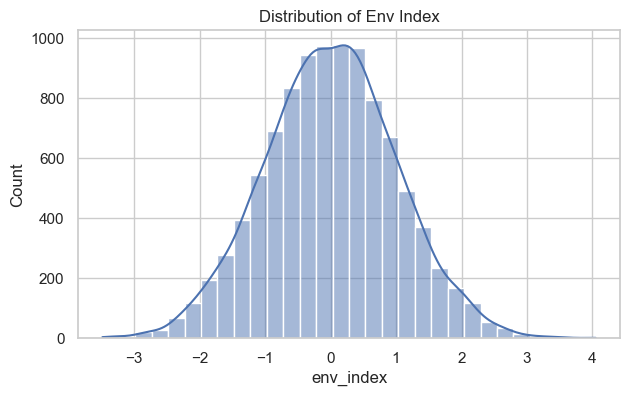

In [12]:
plt.figure(figsize=(7,4))
sns.histplot(cohort["env_index"], kde=True, bins=30)
plt.title("Distribution of Env Index")
plt.show()

In [13]:
cohort["env_index"].describe()

count    10000.000000
mean         0.003659
std          1.002948
min         -3.486467
25%         -0.665262
50%          0.007784
75%          0.671783
max          4.048420
Name: env_index, dtype: float64

### Histogram: Polygenic Score

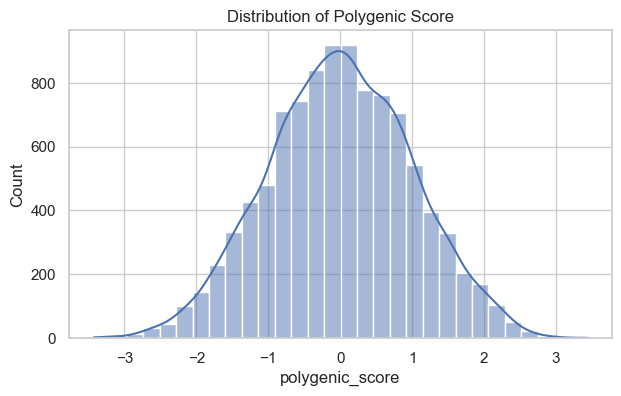

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(cohort["polygenic_score"], kde=True, bins=30)
plt.title("Distribution of Polygenic Score")
plt.show()

In [15]:
cohort["polygenic_score"].describe()

count    1.000000e+04
mean    -7.531753e-17
std      1.000000e+00
min     -3.425425e+00
25%     -6.886466e-01
50%      1.069430e-04
75%      6.954927e-01
max      3.433686e+00
Name: polygenic_score, dtype: float64

### Histogram: Quantitative Trait

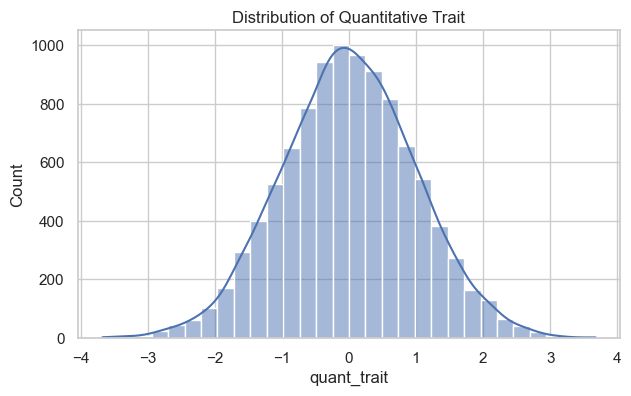

In [16]:
plt.figure(figsize=(7,4))
sns.histplot(cohort["quant_trait"], kde=True, bins=30)
plt.title("Distribution of Quantitative Trait")
plt.show()

In [17]:
cohort["quant_trait"].describe()

count    1.000000e+04
mean    -1.989520e-17
std      1.000000e+00
min     -3.674438e+00
25%     -6.673733e-01
50%     -4.147091e-03
75%      6.718384e-01
max      3.676401e+00
Name: quant_trait, dtype: float64

### Histogram: Disease Prob

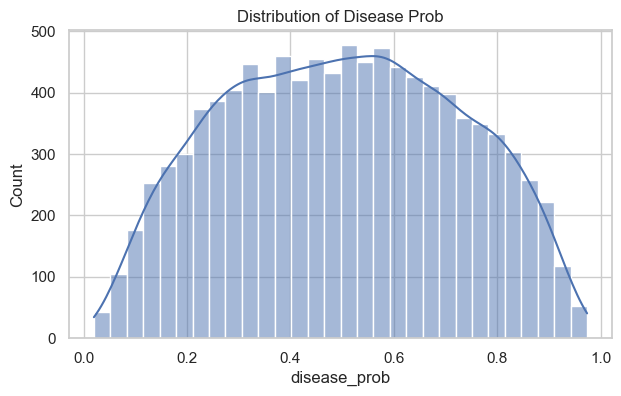

In [18]:
plt.figure(figsize=(7,4))
sns.histplot(cohort["disease_prob"], kde=True, bins=30)
plt.title("Distribution of Disease Prob")
plt.show()

In [19]:
cohort["disease_prob"].describe()

count    10000.000000
mean         0.499984
std          0.224913
min          0.019687
25%          0.318043
50%          0.500888
75%          0.679591
max          0.973832
Name: disease_prob, dtype: float64

### Histogram: PC1

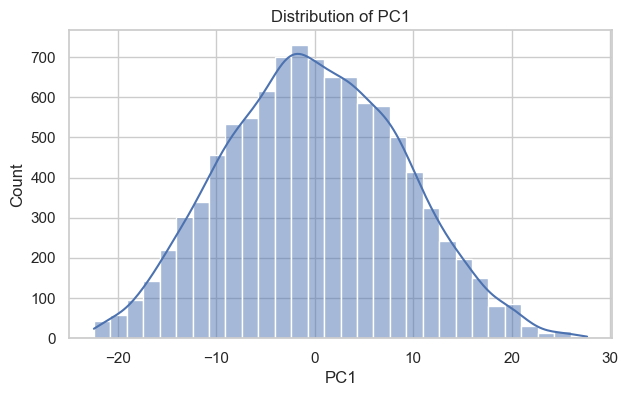

In [20]:
plt.figure(figsize=(7,4))
sns.histplot(cohort["PC1"], kde=True, bins=30)
plt.title("Distribution of PC1")
plt.show()

In [21]:
cohort["PC1"].describe()

count    1.000000e+04
mean    -3.797140e-15
std      8.915065e+00
min     -2.241905e+01
25%     -6.362309e+00
50%     -1.984870e-01
75%      6.361650e+00
max      2.766844e+01
Name: PC1, dtype: float64

### Histogram: PC2

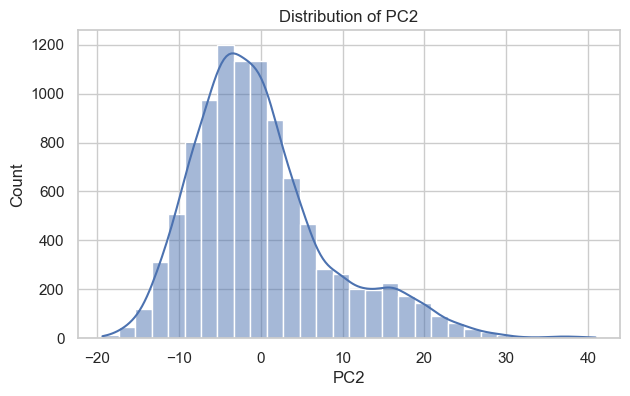

In [22]:
plt.figure(figsize=(7,4))
sns.histplot(cohort["PC2"], kde=True, bins=30)
plt.title("Distribution of PC2")
plt.show()

In [23]:
cohort["PC2"].describe()

count    1.000000e+04
mean     5.741185e-16
std      8.576561e+00
min     -1.935404e+01
25%     -5.800355e+00
50%     -1.473405e+00
75%      3.811644e+00
max      4.090636e+01
Name: PC2, dtype: float64

### Bar Chart: Sex

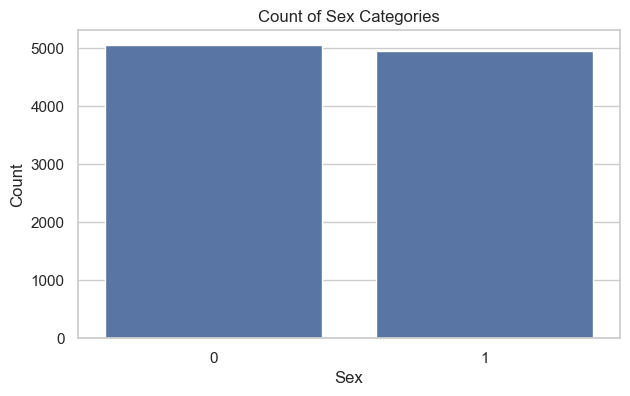

In [24]:
plt.figure(figsize=(7,4))
sns.countplot(x="sex", data=cohort)
plt.title("Count of Sex Categories")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

### Bar Chart: Disease Status

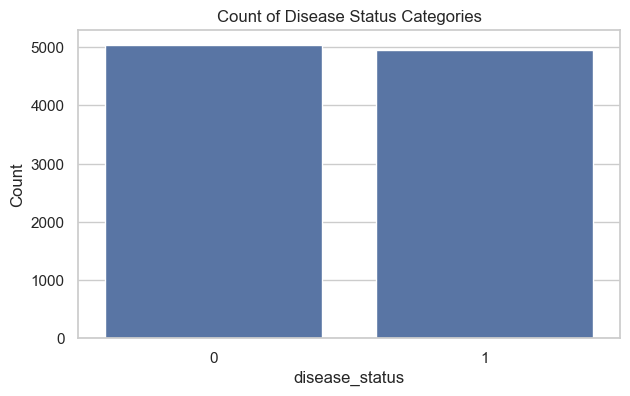

In [25]:
plt.figure(figsize=(7,4))
sns.countplot(x="disease_status", data=cohort)
plt.title("Count of Disease Status Categories")
plt.xlabel("disease_status")
plt.ylabel("Count")
plt.show()

### Correlations

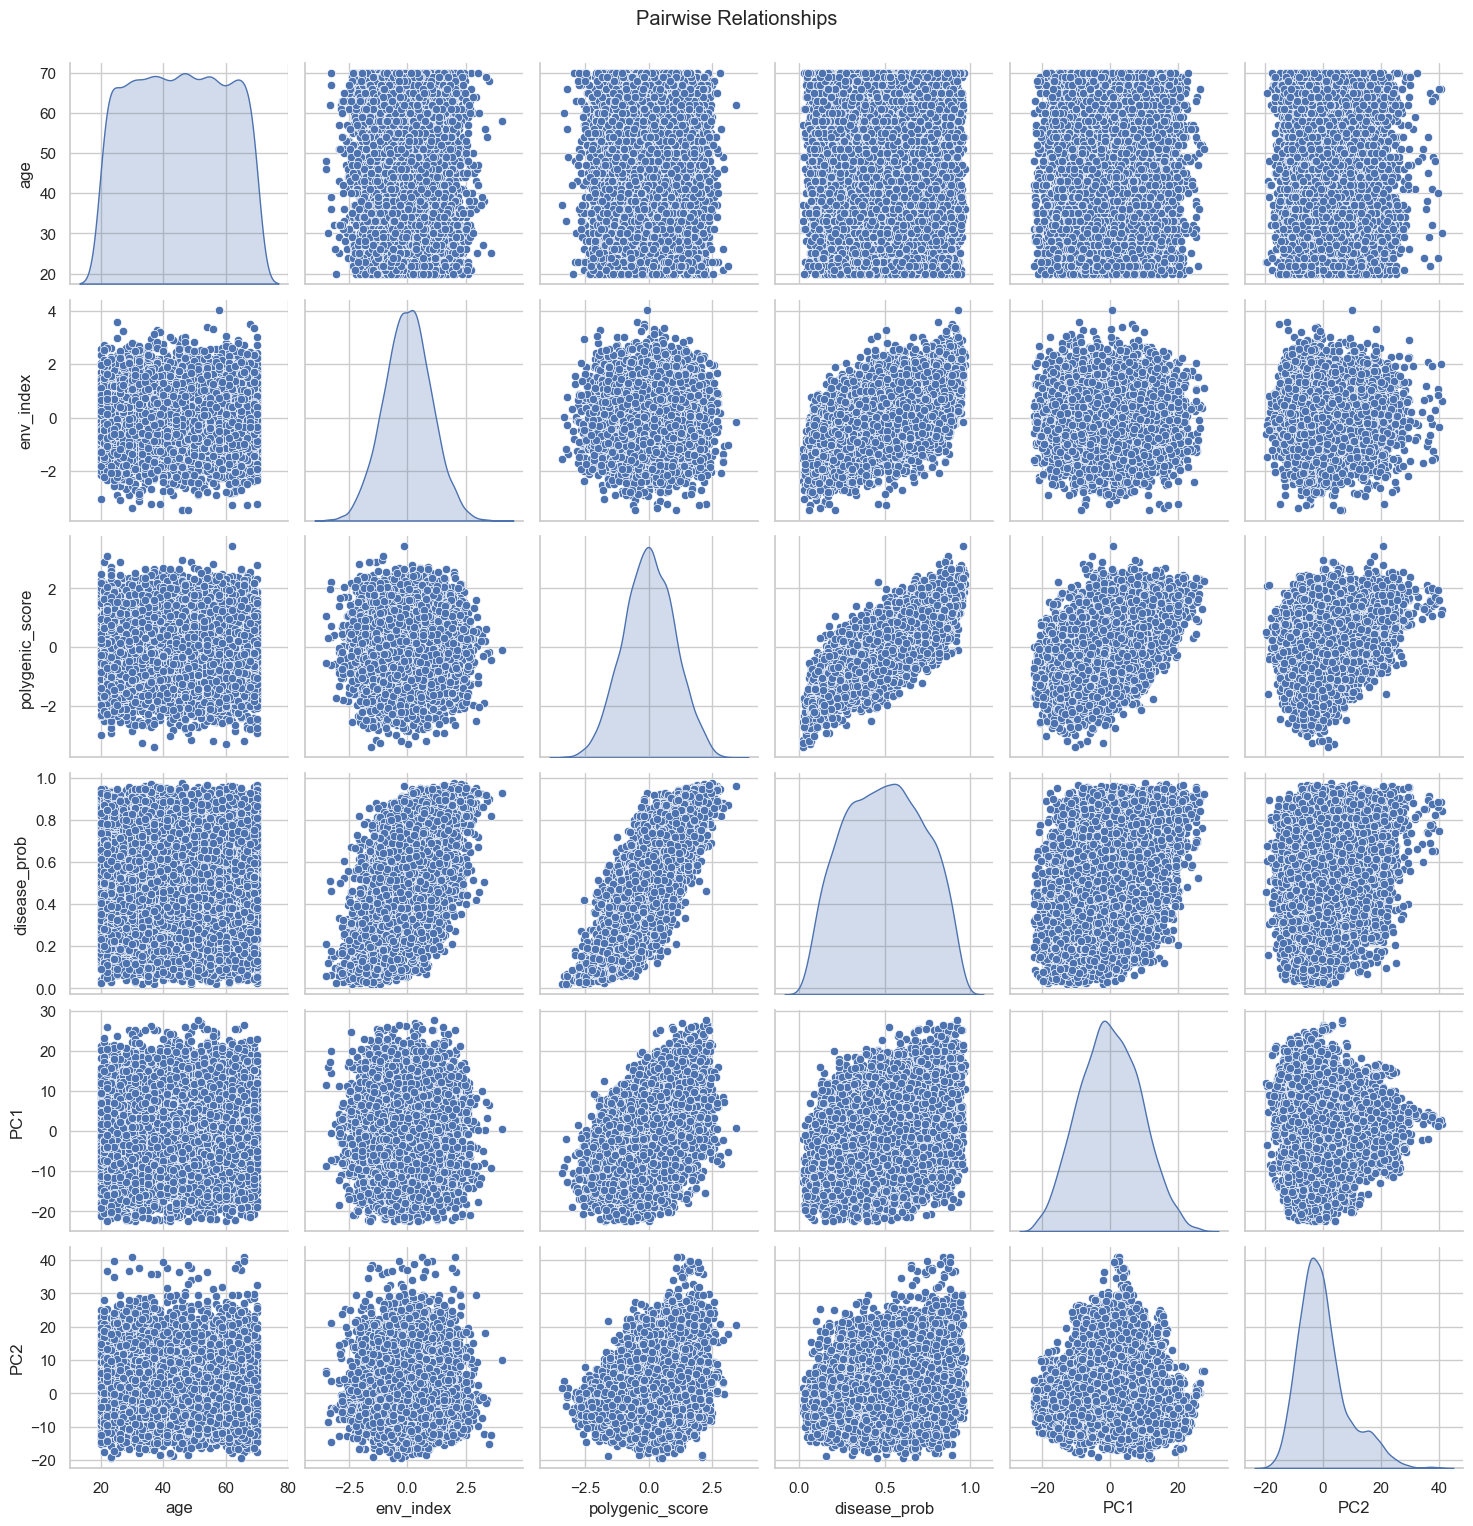

age  env_index  polygenic_score  disease_prob  \
age              1.000000  -0.000247         0.001887      0.031899   
env_index       -0.000247   1.000000         0.017408      0.547487   
polygenic_score  0.001887   0.017408         1.000000      0.815232   
disease_prob     0.031899   0.547487         0.815232      1.000000   
PC1              0.000097   0.018066         0.470501      0.391461   
PC2             -0.007202  -0.011823         0.295038      0.236389   

                          PC1           PC2  
age              9.694601e-05 -7.202352e-03  
env_index        1.806581e-02 -1.182278e-02  
polygenic_score  4.705014e-01  2.950384e-01  
disease_prob     3.914610e-01  2.363886e-01  
PC1              1.000000e+00  5.784070e-16  
PC2              5.784070e-16  1.000000e+00

In [26]:
cohort_numerical_vars = ["age", "env_index", "polygenic_score", "disease_prob", "PC1", "PC2"]
sns.pairplot(cohort[cohort_numerical_vars], diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

cohort[cohort_numerical_vars].corr()

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = cohort[cohort_numerical_vars]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns
print(vif)

         VIF          Feature
0  10.337575              age
1   1.593267        env_index
2   2.767925  polygenic_score
3  12.323916     disease_prob
4   1.320267              PC1
5   1.126462              PC2


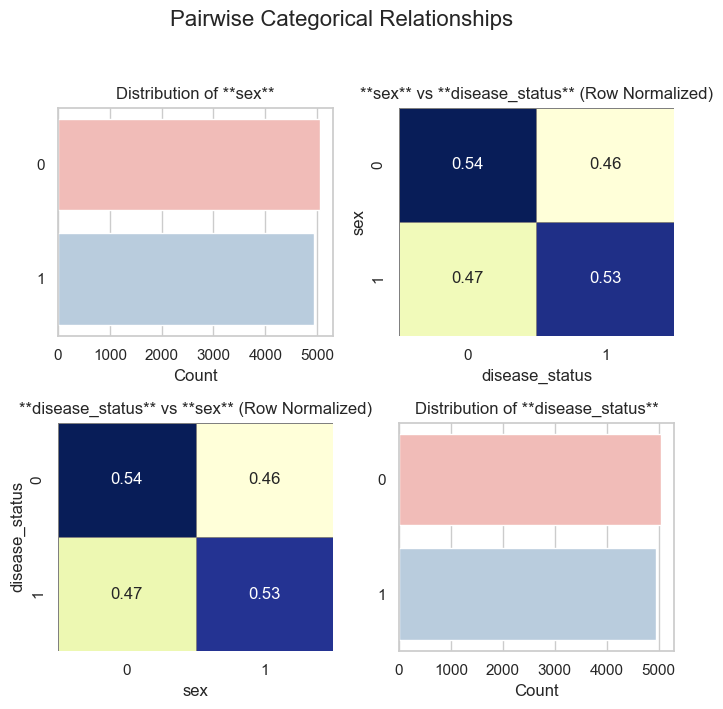

In [28]:
cohort_categorical_vars = ["sex", "disease_status"]
n_cohort_categorical_vars = len(cohort_categorical_vars)

fig, axes = plt.subplots(n_cohort_categorical_vars, n_cohort_categorical_vars, figsize=(n_cohort_categorical_vars * 3.5, n_cohort_categorical_vars * 3.5))
plt.suptitle("Pairwise Categorical Relationships", y=1.01, fontsize=16)

for i in range(n_cohort_categorical_vars):
    for j in range(n_cohort_categorical_vars):
        var1 = cohort_categorical_vars[i]
        var2 = cohort_categorical_vars[j]

        if i == j:
            sns.countplot(
                y=cohort[var1],
                ax=axes[i, j],
                hue=cohort[var1],
                palette="Pastel1",
                order=cohort[var1].value_counts().index,
                legend=False
            )
            axes[i, j].set_title(f"Distribution of **{var1}**", fontsize=12)
            axes[i, j].set_ylabel("")
            axes[i, j].set_xlabel("Count")

        else:
            contingency_table = pd.crosstab(cohort[var1], cohort[var2], normalize='index')
            sns.heatmap(
                contingency_table,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                cbar=False,
                ax=axes[i, j],
                linewidths=.5,
                linecolor='gray'
            )
            axes[i, j].set_title(f"**{var1}** vs **{var2}** (Row Normalized)", fontsize=12)
            axes[i, j].set_ylabel(var1)
            axes[i, j].set_xlabel(var2)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Sex vs Trait

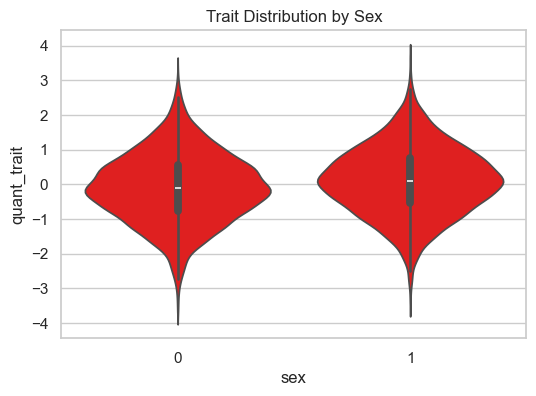

In [29]:
plt.figure(figsize=(6,4))
sns.violinplot(x=cohort["sex"], y=cohort["quant_trait"], color="red")
plt.title("Trait Distribution by Sex")
plt.show()

### Age vs Trait

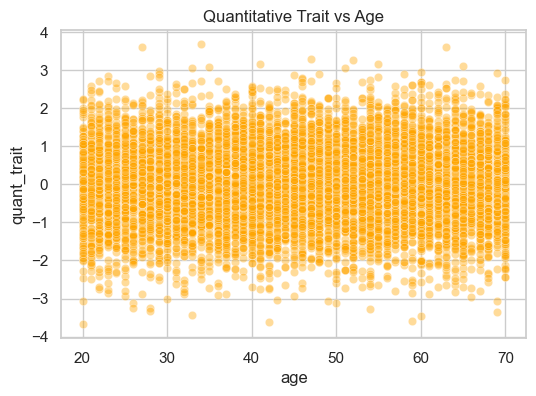

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=cohort["age"], y=cohort["quant_trait"], alpha=0.4, color="orange")
plt.title("Quantitative Trait vs Age")
plt.show()

### Environment vs Trait

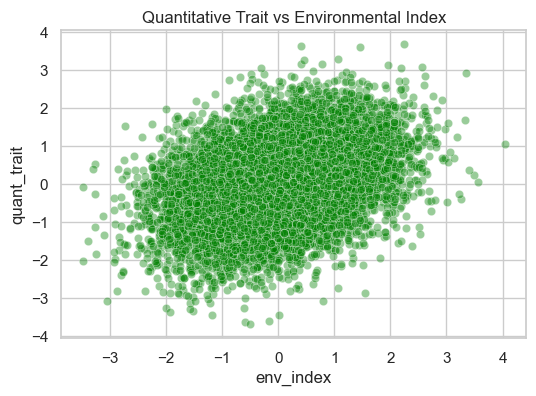

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=cohort["env_index"], y=cohort["quant_trait"], alpha=0.4, color="green")
plt.title("Quantitative Trait vs Environmental Index")
plt.show()

### PRS vs Trait Scatterplot

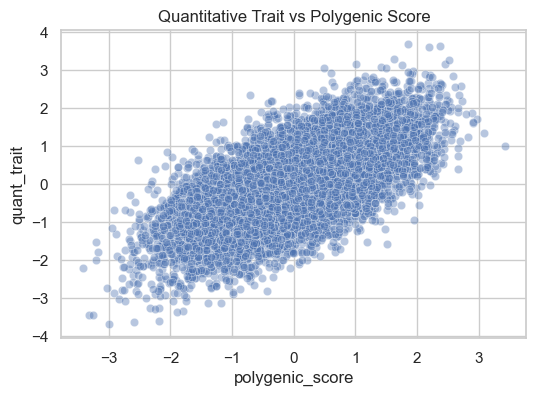

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=cohort["polygenic_score"], y=cohort["quant_trait"], alpha=0.4)
plt.title("Quantitative Trait vs Polygenic Score")
plt.show()

### Disease Prob vs Trait Scatterplot

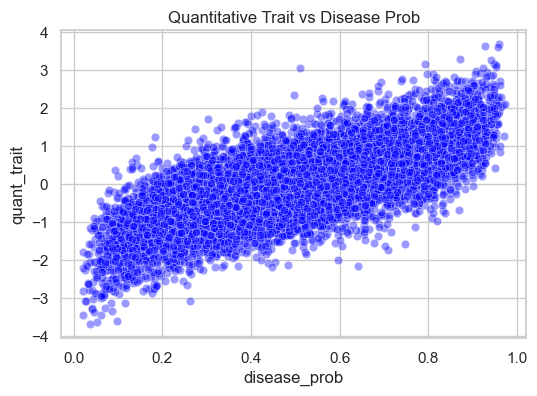

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=cohort["disease_prob"], y=cohort["quant_trait"], alpha=0.4, color="blue")
plt.title("Quantitative Trait vs Disease Prob")
plt.show()

### Correlation Matrix

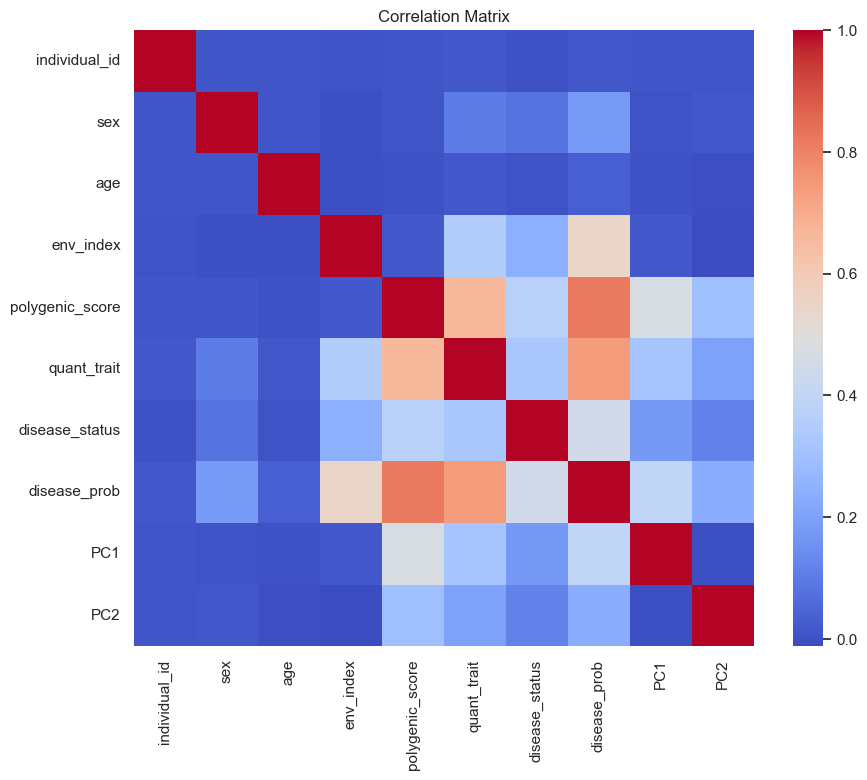

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(cohort.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### PCA Scatterplot

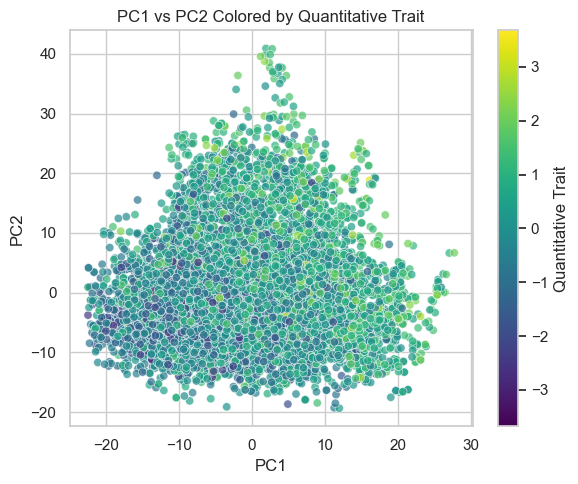

In [35]:
plt.figure(figsize=(6,5))

ax = plt.gca()

scatter = sns.scatterplot(
    x="PC1",
    y="PC2",
    data=cohort,
    hue="quant_trait",
    palette="viridis",
    alpha=0.7,
    legend=False,
    ax=ax
)

# Create normalization and ScalarMappable
norm = plt.Normalize(cohort["quant_trait"].min(), cohort["quant_trait"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add colorbar **and tell it to use this Axes**
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Quantitative Trait")

# Labels and title
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PC1 vs PC2 Colored by Quantitative Trait")

plt.tight_layout()
plt.show()

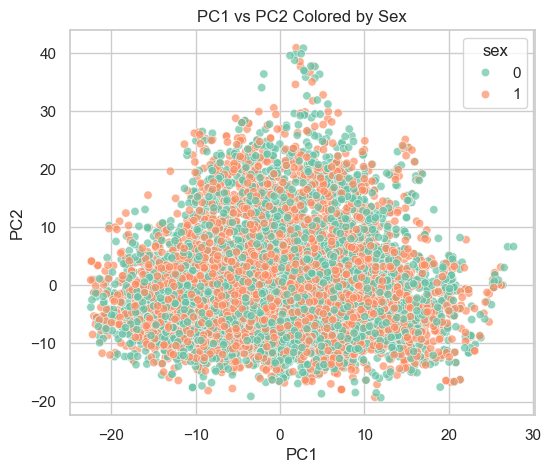

In [36]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=cohort,
    hue="sex",
    palette="Set2",
    alpha=0.7
)
plt.title("PC1 vs PC2 Colored by Sex")
plt.show()

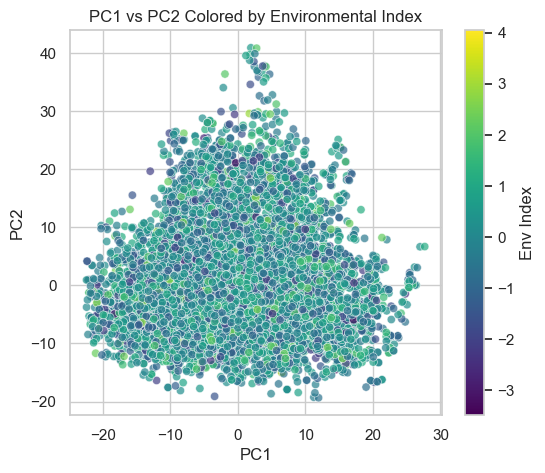

In [37]:
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(6, 5))

sns.scatterplot(
    x="PC1",
    y="PC2",
    data=cohort,
    hue="env_index",
    palette="viridis",
    alpha=0.7,
    legend=False,
    ax=ax
)

# Add colorbar manually
norm = Normalize(cohort["env_index"].min(), cohort["env_index"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

fig.colorbar(sm, ax=ax, label="Env Index")

ax.set_title("PC1 vs PC2 Colored by Environmental Index")
plt.show()

### Outlier Detection

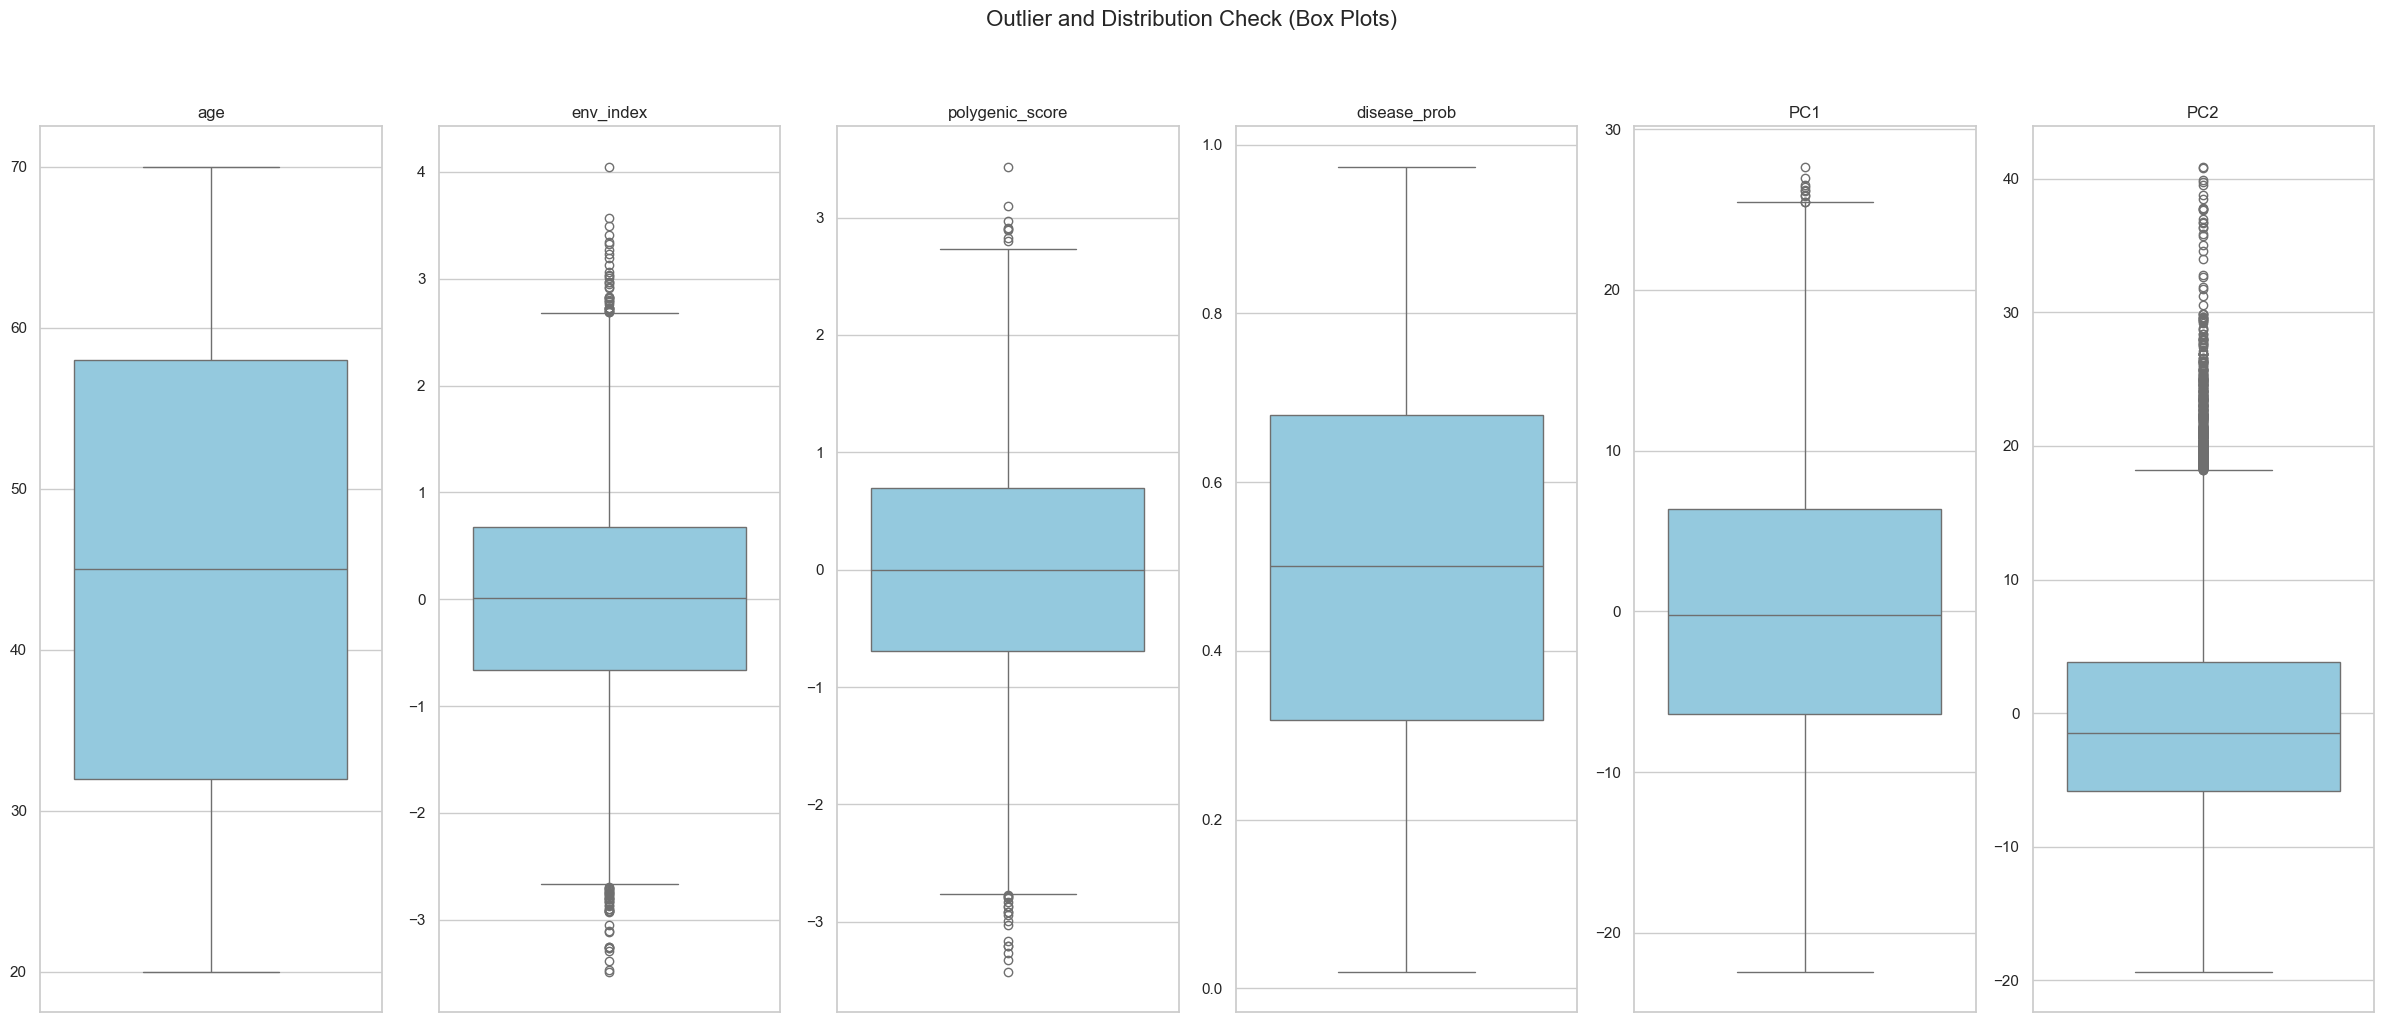

In [38]:
cohort_n_numerical_cols = len(cohort_numerical_vars)

fig, axes = plt.subplots(1, cohort_n_numerical_cols, figsize=(4 * cohort_n_numerical_cols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(cohort_numerical_vars):
    sns.boxplot(y=cohort[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Z-Scores

In [39]:
from scipy.stats import zscore

# Calculate z-scores
cohort["age_z"] = zscore(cohort["age"])
cohort["env_index_z"] = zscore(cohort["env_index"])
cohort["trait_z"] = zscore(cohort["quant_trait"])
cohort["pgs_z"] = zscore(cohort["polygenic_score"])
cohort["disease_prob_z"] = zscore(cohort["disease_prob"])
cohort["PC1_z"] = zscore(cohort["PC1"])
cohort["PC2_z"] = zscore(cohort["PC2"])

# Identify rows with extreme |z| > 3
age_outliers = cohort[cohort["age_z"].abs() > 3]
env_index_outliers = cohort[cohort["env_index_z"].abs() > 3]
trait_outliers = cohort[cohort["trait_z"].abs() > 3]
pgs_outliers = cohort[cohort["pgs_z"].abs() > 3]
disease_prob_outliers = cohort[cohort["disease_prob_z"].abs() > 3]
PC1_outliers = cohort[cohort["PC1_z"].abs() > 3]
PC2_outliers = cohort[cohort["PC2_z"].abs() > 3]

print("Age Outliers:")
display(age_outliers)

print("Env Index Outliers:")
display(env_index_outliers)

print("Trait Outliers:")
display(trait_outliers)

print("Polygenic Score Outliers:")
display(pgs_outliers)

print("Disease Prob Outliers:")
display(disease_prob_outliers)

print("PC1 Outliers:")
display(PC1_outliers)

print("PC2 Outliers:")
display(PC2_outliers)

Age Outliers:


Empty DataFrame
Columns: [individual_id, sex, age, env_index, polygenic_score, quant_trait, disease_status, disease_prob, PC1, PC2, age_z, env_index_z, trait_z, pgs_z, disease_prob_z, PC1_z, PC2_z]
Index: []

Env Index Outliers:


individual_id  sex   age  env_index  polygenic_score  quant_trait  \
341             341    0  38.0   3.268242        -1.909584    -0.388532   
807             807    0  39.0  -3.256558         2.233942     0.534361   
1425           1425    1  58.0   4.048420        -0.084291     1.059243   
1543           1543    0  70.0  -3.252614         0.336460    -1.835491   
2695           2695    0  25.0   3.567357        -0.448325     0.065579   
2952           2952    1  39.0   3.189585         0.422397     1.223410   
3047           3047    0  46.0  -3.474087         1.053978    -0.081547   
3132           3132    0  32.0  -3.116595         0.418144    -0.836613   
3557           3557    1  68.0   3.491974        -0.181512     0.228423   
3767           3767    1  54.0   3.408745        -0.190338     0.356762   
4298           4298    1  56.0   3.329388         0.221109     1.688806   
4960           4960    1  26.0  -3.108773        -0.562680    -1.341000   
4990           4990    0  30.0  -3.384238         0.302931    -1.488839   
5207           5207    0  69.0   3.342063         0.602977     2.922501   
5968           5968    1  47.0   3.031101         0.627754     1.600646   
6005           6005    1  70.0   3.026861        -1.239701     0.582563   
6644           6644    0  20.0  -3.045137        -1.750891    -3.060388   
7442           7442    0  37.0   3.126438         0.190937     0.679342   
7931           7931    0  67.0  -3.263119        -0.626276    -1.131370   
8279           8279    0  36.0  -3.259828         0.702996    -0.247488   
8328           8328    1  62.0  -3.294619         1.970823     0.404713   
8874           8874    0  60.0   3.063238        -2.048941     0.851893   
8959           8959    1  27.0   3.228016        -0.295966    -0.256893   
9137           9137    0  48.0  -3.486467        -0.556847    -2.022589   

      disease_status  disease_prob        PC1        PC2     age_z  \
341                0      0.506975  -8.009692 -12.066938 -0.480618   
807                1      0.461140  20.119693  -4.460362 -0.412295   
1425               1      0.929548   0.664120  10.048170  0.885841   
1543               1      0.142145  14.450845 -14.535762  1.705717   
2695               1      0.816956  -9.162362 -12.304398 -1.368816   
2952               1      0.922838  10.047782  -7.322282 -0.412295   
3047               0      0.208516  11.421396   6.798040  0.065966   
3132               0      0.151827  -7.309763  -4.747989 -0.890556   
3557               0      0.898338   6.495824 -15.007354  1.569071   
3767               1      0.890154   3.401532  -1.976413  0.612549   
4298               1      0.918273   0.376341  18.189550  0.749195   
4960               0      0.098795   1.878206  -4.238047 -1.300493   
4990               0      0.120392  15.922233  -8.403389 -1.027201   
5207               1      0.916601   7.342592  -2.803220  1.637394   
5968               1      0.930064 -17.570956   2.472944  0.134289   
6005               1      0.721428  -8.792966  -9.764399  1.705717   
6644               0      0.025229  -7.016000  -4.534812 -1.710431   
7442               0      0.861909 -11.632133  -0.645284 -0.548941   
7931               0      0.064374  -7.254872   3.703493  1.500748   
8279               1      0.176286  -0.335909  21.079570 -0.617264   
8328               1      0.507935  17.134273  -5.922309  1.159133   
8874               1      0.456254 -13.082843  -2.075437  1.022487   
8959               0      0.862175  -4.900511  -0.977054 -1.232170   
9137               0      0.058033  -8.556060   6.032512  0.202612   

      env_index_z   trait_z     pgs_z  disease_prob_z     PC1_z     PC2_z  
341      3.255152 -0.388552 -1.909680        0.031084 -0.898490 -1.407037  
807     -3.250797  0.534388  2.234054       -0.172716  2.256932 -0.520090  
1425     4.033075  1.059296 -0.084295        1.910003  0.074498  1.171644  
1543    -3.246864 -1.835583  0.336477       -1.591086  1.621028 -1.694909  

Trait Outliers:


individual_id  sex   age  env_index  polygenic_score  quant_trait  \
55               55    1  60.0   0.024134        -3.324746    -3.450029   
470             470    0  50.0  -1.570788        -1.395373    -3.129654   
538             538    0  30.0  -0.584755        -2.392583    -3.000630   
687             687    1  34.0   2.252178         1.853300     3.676401   
872             872    0  26.0  -1.222146        -1.175189    -3.109781   
1392           1392    0  47.0   1.064637         1.629027     3.287086   
1488           1488    0  26.0  -0.606161        -2.187053    -3.253065   
1630           1630    1  27.0   0.409911         2.372480     3.613300   
1764           1764    1  35.0   2.562380         1.411363     3.078510   
2142           2142    1  55.0   0.785097         2.460787     3.145882   
2760           2760    0  33.0  -1.175947        -3.263626    -3.433505   
2790           2790    0  59.0  -0.170791        -2.181061    -3.592296   
3224           3224    0  42.0  -0.593953        -2.589772    -3.620006   
3678           3678    1  69.0   0.792149        -1.958577    -3.062990   
4083           4083    0  20.0  -0.498510        -2.995812    -3.674438   
4371           4371    1  43.0  -1.245491        -2.830203    -3.028976   
4955           4955    1  28.0  -2.007439        -2.338433    -3.252634   
5257           5257    1  63.0   1.464862         2.193893     3.611756   
5530           5530    1  28.0  -1.515822        -1.788004    -3.335705   
5885           5885    0  33.0  -0.301659         0.494051     3.043239   
6279           6279    0  51.0   2.196375         1.504060     3.046456   
6644           6644    0  20.0  -3.045137        -1.750891    -3.060388   
7254           7254    0  54.0  -1.570459        -2.256907    -3.279698   
8075           8075    1  41.0   0.398916         1.004256     3.154279   
8689           8689    0  69.0  -1.931346        -1.898042    -3.350747   
8988           8988    1  65.0   1.961047         1.754560     3.115567   
9075           9075    1  52.0   0.462235         2.523959     3.255747   
9138           9138    0  49.0  -1.475149        -2.738472    -3.069301   

      disease_status  disease_prob        PC1        PC2     age_z  \
55                 0      0.060250  -8.848718   3.785936  1.022487   
470                0      0.084082  -1.501423  -6.923775  0.339258   
538                0      0.060940 -12.719575  -3.616202 -1.027201   
687                1      0.960708   1.577190  23.562006 -0.753910   
872                0      0.116092 -14.572613  -5.655727 -1.300493   
1392               1      0.870899  16.096333  18.832564  0.134289   
1488               0      0.071025 -12.021484  -1.849426 -1.300493   
1630               1      0.927184  -4.887179  -0.617219 -1.232170   
1764               1      0.951987   4.196454  13.832497 -0.685587   
2142               1      0.948152  -4.392800   5.697492  0.680872   
2760               1      0.020482  -1.964255  -3.684271 -0.822233   
2790               0      0.096494  -8.817396   4.358309  0.954164   
3224               0      0.052481 -20.598518  -4.756614 -0.207326   
3678               0      0.261476   7.960459  -0.600078  1.637394   
4083               0      0.037448 -10.473149  -5.762883 -1.710431   
4371               0      0.043163 -14.251821  -3.904479 -0.139003   
4955               0      0.041330  -8.295451  -3.778989 -1.163847   
5257               1      0.956488   3.338827  -2.963127  1.227456   
5530               0      0.086779  -3.414456   0.922623 -1.163847   
5885               1      0.509745   0.901399   0.613707 -0.822233   
6279               0      0.922992   7.304034  14.812822  0.407581   
6644               0      0.025229  -7.016000  -4.534812 -1.710431   
7254               0      0.040890  -6.139091  -7.724062  0.612549   
8075               1      0.791652   7.205335   5.139968 -0.275649   
8689               0      0.046623  -2.528092   0.721359  1.637394   
8988      

Polygenic Score Outliers:


individual_id  sex   age  env_index  polygenic_score  quant_trait  \
55               55    1  60.0   0.024134        -3.324746    -3.450029   
714             714    0  49.0  -1.351365        -3.166779    -1.792224   
2152           2152    0  22.0  -1.036083         3.096465     1.341943   
2649           2649    1  37.0  -1.565009        -3.425425    -2.192448   
2760           2760    0  33.0  -1.175947        -3.263626    -3.433505   
5115           5115    0  56.0   0.779590        -3.206921    -1.509827   
7921           7921    1  66.0  -0.274318        -3.202653    -1.999363   
8664           8664    1  42.0   0.317784        -3.027625    -2.723814   
9927           9927    1  62.0  -0.155078         3.433686     0.998583   

      disease_status  disease_prob        PC1        PC2     age_z  \
55                 0      0.060250  -8.848718   3.785936  1.022487   
714                0      0.020779 -12.582909   1.703357  0.270935   
2152               1      0.871911  -5.247178  17.787510 -1.573785   
2649               0      0.021075 -10.456278   1.697875 -0.548941   
2760               1      0.020482  -1.964255  -3.684271 -0.822233   
5115               1      0.069396  -6.853445  -1.123391  0.749195   
7921               0      0.057108 -12.626844  -0.322908  1.432425   
8664               0      0.087831 -18.952168  -5.507904 -0.207326   
9927               1      0.962022   0.758688  20.656930  1.159133   

      env_index_z   trait_z     pgs_z  disease_prob_z     PC1_z     PC2_z  
55       0.020416 -3.450201 -3.324912       -1.955225 -0.992608  0.441450  
714     -1.351108 -1.792313 -3.166938       -2.130725 -1.411492  0.198616  
2152    -1.036738  1.342010  3.096620        1.653726 -0.588604  2.074071  
2649    -1.564136 -2.192557 -3.425597       -2.129409 -1.172936  0.197977  
2760    -1.176197 -3.433677 -3.263790       -2.132046 -0.220341 -0.429596  
5115     0.773689 -1.509903 -3.207082       -1.914556 -0.768787 -0.130990  
7921    -0.277174 -1.999463 -3.202813       -1.969194 -1.416420 -0.037652  
8664     0.313218 -2.723950 -3.027777       -1.832588 -2.125965 -0.642236  
9927    -0.158278  0.998633  3.433858        2.054398  0.085106  2.408653

Disease Prob Outliers:


Empty DataFrame
Columns: [individual_id, sex, age, env_index, polygenic_score, quant_trait, disease_status, disease_prob, PC1, PC2, age_z, env_index_z, trait_z, pgs_z, disease_prob_z, PC1_z, PC2_z]
Index: []

PC1 Outliers:


individual_id  sex   age  env_index  polygenic_score  quant_trait  \
3573           3573    0  52.0   0.339104         1.285643     1.101838   
9277           9277    0  51.0   1.115918         2.239068     2.034296   

      disease_status  disease_prob        PC1       PC2     age_z  \
3573               1      0.764015  26.975441  6.641162  0.475904   
9277               0      0.923927  27.668438  6.673403  0.407581   

      env_index_z   trait_z     pgs_z  disease_prob_z     PC1_z     PC2_z  
3573     0.334476  1.101893  1.285707        1.173980  3.025978  0.774377  
9277     1.109046  2.034398  2.239180        1.885011  3.103715  0.778137

PC2 Outliers:


individual_id  sex   age  env_index  polygenic_score  quant_trait  \
202             202    0  70.0  -0.424810         0.510919    -1.286438   
242             242    0  57.0   1.305269         0.752604     1.377822   
257             257    0  64.0   2.923643         1.591498     2.207631   
282             282    0  49.0   0.211972         0.946518     0.332731   
364             364    1  43.0  -1.228626         0.893390     0.021822   
...             ...  ...   ...        ...              ...          ...   
9735           9735    0  29.0   1.328587         0.893390     1.172204   
9874           9874    0  66.0  -0.345604         1.609344     1.282368   
9883           9883    0  40.0   0.852659         1.933842     2.125335   
9902           9902    0  54.0  -1.807525         0.907879     0.530213   
9991           9991    1  34.0   1.557992         0.321546     1.127412   

      disease_status  disease_prob       PC1        PC2     age_z  \
202                0      0.514024  5.792330  26.345638  1.705717   
242                1      0.783305 -4.855154  26.849537  0.817518   
257                0      0.953709  1.694784  29.591804  1.295779   
282                1      0.687225 -2.164828  34.033211  0.270935   
364                1      0.565301 -4.511786  28.016510 -0.139003   
...              ...           ...       ...        ...       ...   
9735               1      0.797112 -4.511786  28.016510 -1.095524   
9874               1      0.747253  2.509537  39.881687  1.432425   
9883               1      0.885110  1.186007  39.561101 -0.343972   
9902               0      0.389587 -1.241341  27.748565  0.612549   
9991               0      0.802433  3.200424  26.589884 -0.753910   

      env_index_z   trait_z     pgs_z  disease_prob_z     PC1_z     PC2_z  
202     -0.427231 -1.286502  0.510945        0.062427  0.649756  3.071972  
242      1.297850  1.377891  0.752642        1.259751 -0.544628  3.130728  
257      2.911548  2.207742  1.591577        2.017432  0.190113  3.450484  
282      0.207712  0.332747  0.946565        0.832544 -0.242840  3.968364  
364     -1.228724  0.021823  0.893435        0.290425 -0.506111  3.266800  
...           ...       ...       ...             ...       ...       ...  
9735     1.321101  1.172262  0.893435        1.321142 -0.506111  3.266800  
9874    -0.348254  1.282433  1.609424        1.099454  0.281508  4.650312  
9883     0.846548  2.125441  1.933939        1.712415  0.133041  4.612930  
9902    -1.805951  0.530240  0.907925       -0.490866 -0.139248  3.235557  
9991     1.549843  1.127468  0.321562        1.344803  0.359008  3.100452  

[79 rows x 17 columns]

### Scree Plot

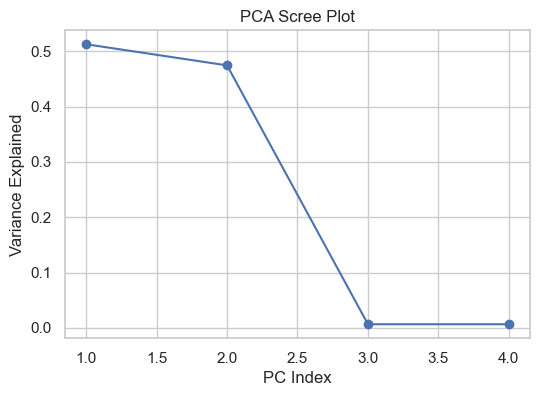

In [40]:
pcs = [col for col in cohort.columns if col.startswith("PC")]

if pcs:
    explained = cohort[pcs].var() / cohort[pcs].var().sum()
    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(pcs)+1), explained.values, marker='o')
    plt.title("PCA Scree Plot")
    plt.xlabel("PC Index")
    plt.ylabel("Variance Explained")
    plt.show()
else:
    print("No PCs included in this dataset.")

### Sanity Checks

In [41]:
import statsmodels.api as sm

X = sm.add_constant(cohort["polygenic_score"])
ols_prs = sm.OLS(cohort["quant_trait"], X).fit()
ols_prs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            quant_trait   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     7845.
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:32:20   Log-Likelihood:                -11293.
No. Observations:               10000   AIC:                         2.259e+04
Df Residuals:                    9998   BIC:                         2.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.541e-18      0.007  -1.27e-15      1.000      -0.015       0.015
polygenic_score     0.6631      0.007     88.570      0.000       0.648       0.678
==============================================================================
Omnibus:                        1.389   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.413
Skew:                           0.027   Prob(JB):                        0.493
Kurtosis:                       2.980   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

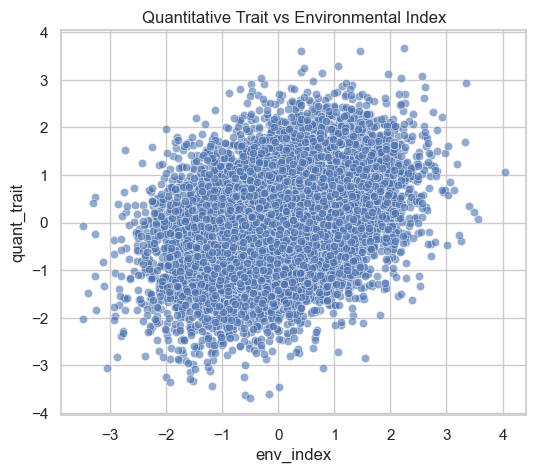

Correlation trait ~ environment: 0.3535161473890902


In [42]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="env_index", y="quant_trait", data=cohort, alpha=0.6)
plt.title("Quantitative Trait vs Environmental Index")
plt.show()

corr = cohort["env_index"].corr(cohort["quant_trait"])
print("Correlation trait ~ environment:", corr)

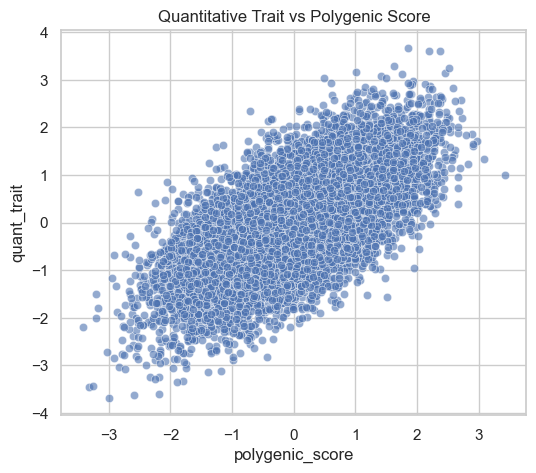

Correlation trait ~ polygenic score: 0.6630650406912417


In [43]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="polygenic_score", y="quant_trait", data=cohort, alpha=0.6)
plt.title("Quantitative Trait vs Polygenic Score")
plt.show()

corr = cohort["polygenic_score"].corr(cohort["quant_trait"])
print("Correlation trait ~ polygenic score:", corr)

In [44]:
pcs = [c for c in cohort.columns if c.startswith("PC")]
cohort[pcs + ["env_index"]].corr()

PC1           PC2         PC1_z         PC2_z  env_index
PC1        1.000000e+00  5.784070e-16  1.000000e+00  5.740118e-16   0.018066
PC2        5.784070e-16  1.000000e+00  5.722679e-16  1.000000e+00  -0.011823
PC1_z      1.000000e+00  5.722679e-16  1.000000e+00  5.778164e-16   0.018066
PC2_z      5.740118e-16  1.000000e+00  5.778164e-16  1.000000e+00  -0.011823
env_index  1.806581e-02 -1.182278e-02  1.806581e-02 -1.182278e-02   1.000000

## Effect

### Data Overview

In [45]:
effects.head()

variant_index  position      maf  beta  is_causal
0              0    3486.0  0.03150   0.0          0
1              1    3693.0  0.19555   0.0          0
2              2    4585.0  0.04970   0.0          0
3              3    4823.0  0.01140   0.0          0
4              4    5865.0  0.09760   0.0          0

In [46]:
effects.shape

(1994, 5)

In [47]:
effects.dtypes

variant_index      int64
position         float64
maf              float64
beta             float64
is_causal          int64
dtype: object

In [48]:
effects.isna().sum()

variant_index    0
position         0
maf              0
beta             0
is_causal        0
dtype: int64

In [49]:
effects.isnull().sum()

variant_index    0
position         0
maf              0
beta             0
is_causal        0
dtype: int64

In [50]:
effects.info()
effects.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   variant_index  1994 non-null   int64  
 1   position       1994 non-null   float64
 2   maf            1994 non-null   float64
 3   beta           1994 non-null   float64
 4   is_causal      1994 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.0 KB


variant_index       position          maf         beta   is_causal
count    1994.000000    1994.000000  1994.000000  1994.000000  1994.00000
mean      996.500000  502559.402207     0.147146     0.000350     0.05015
std       575.762538  282888.897475     0.138887     0.011607     0.21831
min         0.000000    3486.000000     0.010000    -0.182250     0.00000
25%       498.250000  284161.000000     0.032662     0.000000     0.00000
50%       996.500000  486328.000000     0.093450     0.000000     0.00000
75%      1494.750000  746764.750000     0.234100     0.000000     0.00000
max      1993.000000  999811.000000     0.499000     0.128277     1.00000

In [51]:
effects.describe().T

count           mean            std         min  \
variant_index  1994.0     996.500000     575.762538     0.00000   
position       1994.0  502559.402207  282888.897475  3486.00000   
maf            1994.0       0.147146       0.138887     0.01000   
beta           1994.0       0.000350       0.011607    -0.18225   
is_causal      1994.0       0.050150       0.218310     0.00000   

                         25%           50%          75%            max  
variant_index     498.250000     996.50000    1494.7500    1993.000000  
position       284161.000000  486328.00000  746764.7500  999811.000000  
maf                 0.032662       0.09345       0.2341       0.499000  
beta                0.000000       0.00000       0.0000       0.128277  
is_causal           0.000000       0.00000       0.0000       1.000000

### Histograms: Position

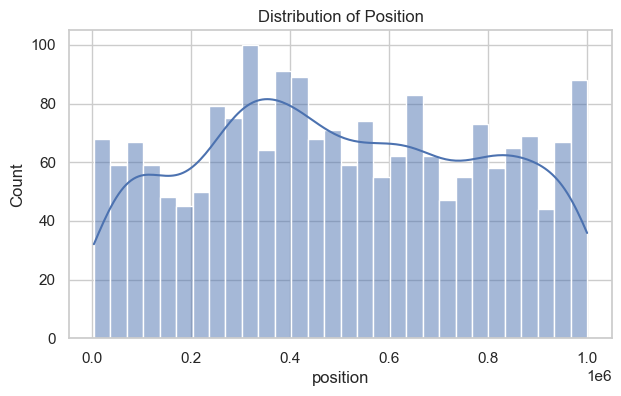

In [52]:
plt.figure(figsize=(7,4))
sns.histplot(effects["position"], kde=True, bins=30)
plt.title("Distribution of Position")
plt.show()

In [53]:
effects["position"].describe()

count      1994.000000
mean     502559.402207
std      282888.897475
min        3486.000000
25%      284161.000000
50%      486328.000000
75%      746764.750000
max      999811.000000
Name: position, dtype: float64

### Histograms: MAF

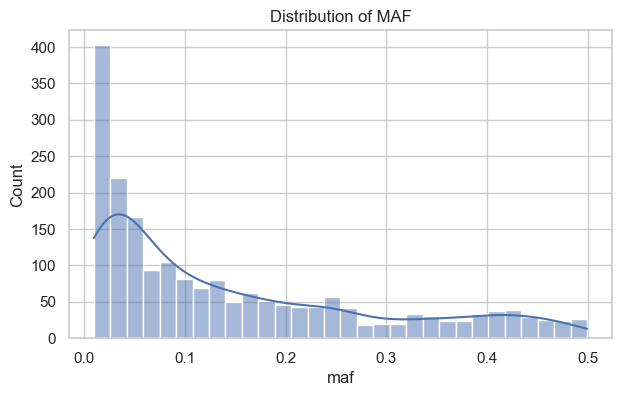

In [54]:
plt.figure(figsize=(7,4))
sns.histplot(effects["maf"], kde=True, bins=30)
plt.title("Distribution of MAF")
plt.show()

In [55]:
effects["maf"].describe()

count    1994.000000
mean        0.147146
std         0.138887
min         0.010000
25%         0.032662
50%         0.093450
75%         0.234100
max         0.499000
Name: maf, dtype: float64

### Histogram: β

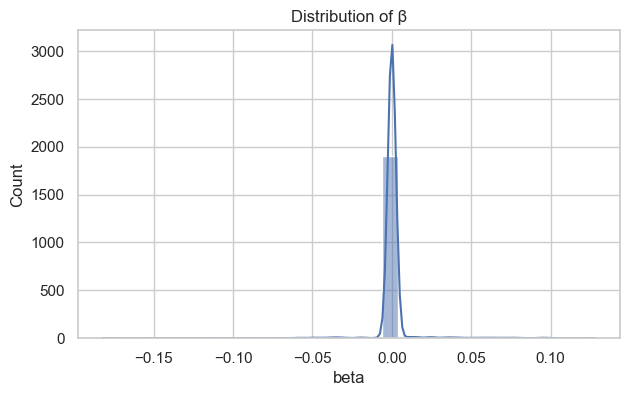

In [56]:
plt.figure(figsize=(7,4))
sns.histplot(effects["beta"], kde=True, bins=30)
plt.title("Distribution of β")
plt.show()

In [57]:
effects["beta"].describe()

count    1994.000000
mean        0.000350
std         0.011607
min        -0.182250
25%         0.000000
50%         0.000000
75%         0.000000
max         0.128277
Name: beta, dtype: float64

### Histogram: Casual

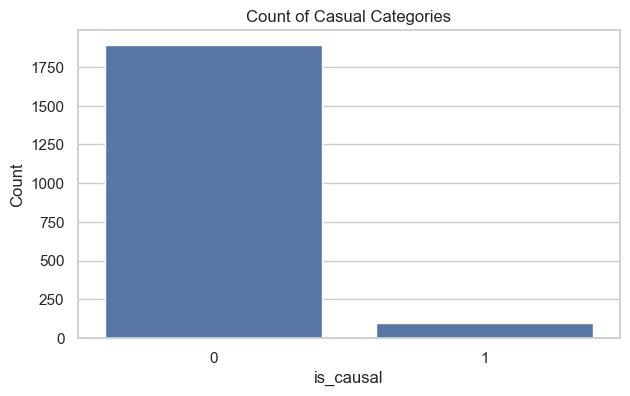

In [58]:
plt.figure(figsize=(7,4))
sns.countplot(x="is_causal", data=effects)
plt.title("Count of Casual Categories")
plt.xlabel("is_causal")
plt.ylabel("Count")
plt.show()

### Correlations:

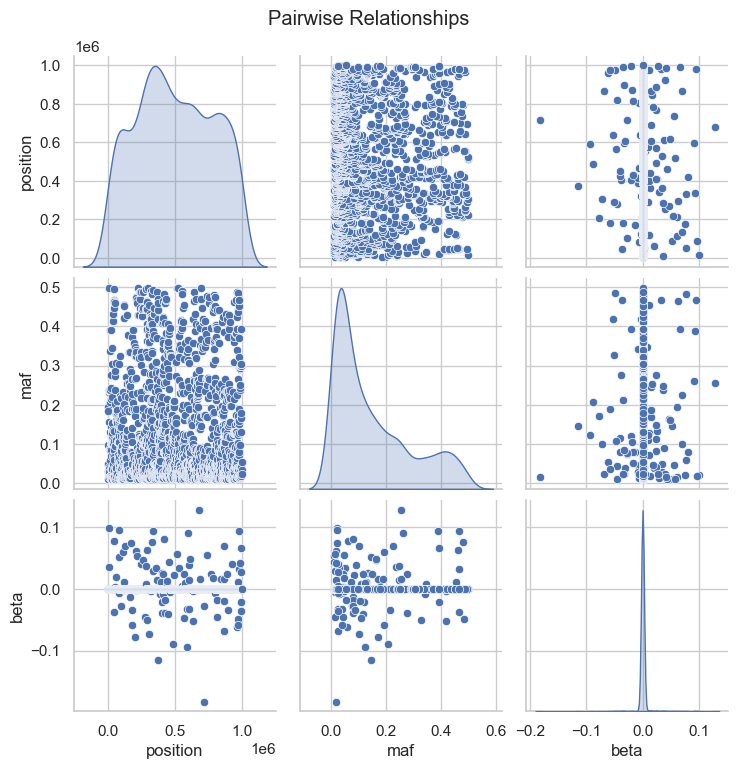

position       maf      beta
position  1.000000 -0.016602 -0.030879
maf      -0.016602  1.000000  0.020715
beta     -0.030879  0.020715  1.000000

In [59]:
effect_numerical_vars = ["position","maf","beta"]

sns.pairplot(effects[effect_numerical_vars], diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()
effects[effect_numerical_vars].corr()

In [60]:
X = effects[effect_numerical_vars]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns
print(vif)

        VIF   Feature
0  1.652418  position
1  1.654373       maf
2  1.001529      beta


### Position vs Beta

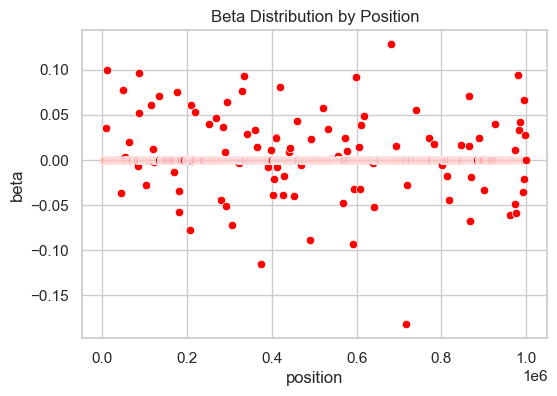

In [61]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=effects["position"], y=effects["beta"], color="red")
plt.title("Beta Distribution by Position")
plt.show()

### MAF vs Beta

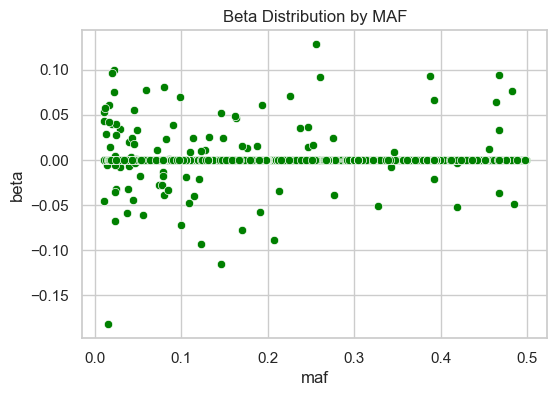

In [62]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=effects["maf"], y=effects["beta"], color="green")
plt.title("Beta Distribution by MAF")
plt.show()

### Correlation Matrix

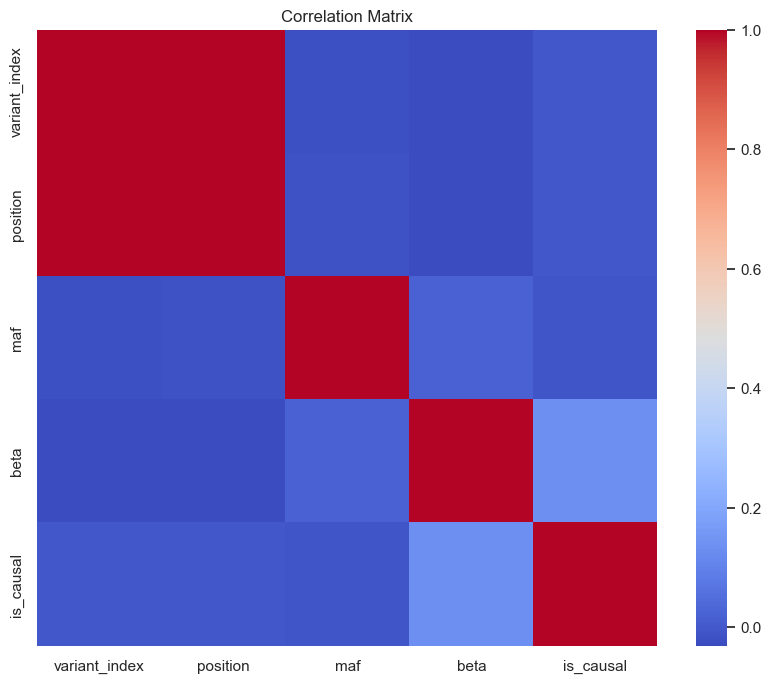

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(effects.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Causal vs Non-Causal β Distributions

/var/folders/99/x1hdk7dx2bs7cn5ph7ykdjk40000gn/T/ipykernel_67843/1367889426.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(effects[effects["is_causal"]==0]["beta"], label="Non-Causal", fill=True)


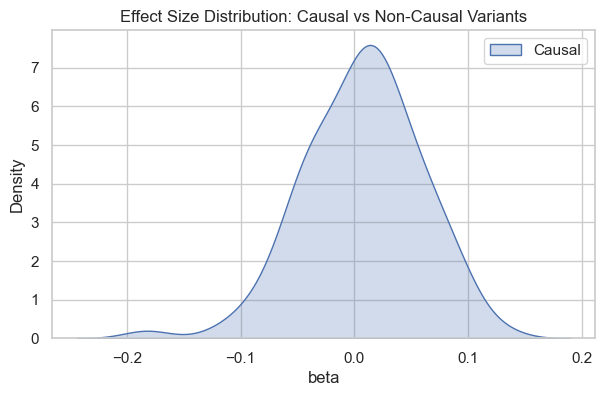

0.05015045135406219

In [64]:
plt.figure(figsize=(7,4))
sns.kdeplot(effects[effects["is_causal"]==1]["beta"], label="Causal", fill=True)
sns.kdeplot(effects[effects["is_causal"]==0]["beta"], label="Non-Causal", fill=True)
plt.title("Effect Size Distribution: Causal vs Non-Causal Variants")
plt.legend()
plt.show()

effects["is_causal"].mean()

The proportion of causal variants is approximately 5% (0.05015), consistent with the simulation parameter prop_causal = 0.05. This indicates a sparse polygenic architecture where most variants have no effect, and a minority contribute small but meaningful effect sizes. This structure is ideal for evaluating shrinkage methods such as ridge, lasso, and elastic net.

### Outlier Detection

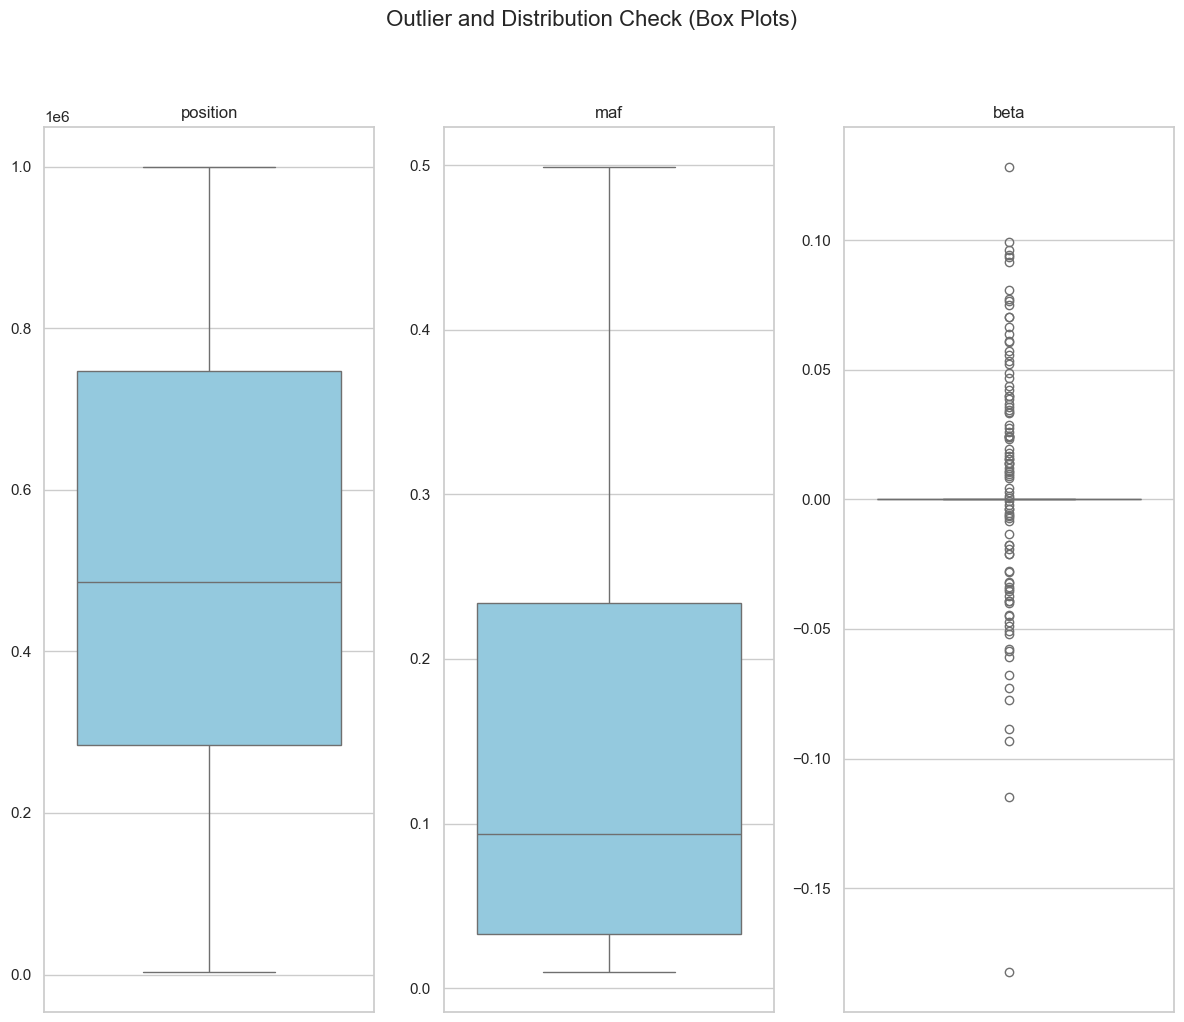

In [65]:
effect_n_numerical_cols = len(effect_numerical_vars)

fig, axes = plt.subplots(1, effect_n_numerical_cols, figsize=(4 * effect_n_numerical_cols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(effect_numerical_vars):
    sns.boxplot(y=effects[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Z-Scores

In [66]:
# Calculate z-scores
effects["position_z"] = zscore(effects["position"])
effects["maf_z"] = zscore(effects["maf"])
effects["beta_z"] = zscore(effects["beta"])

# Identify rows with extreme |z| > 3
position_outliers = effects[effects["position_z"].abs() > 3]
maf_outliers = effects[effects["maf_z"].abs() > 3]
beta_outliers = effects[effects["beta_z"].abs() > 3]

print("Position Outliers:")
display(position_outliers)

print("MAF Outliers:")
display(maf_outliers)

print("β Outliers:")
display(beta_outliers)

Position Outliers:


Empty DataFrame
Columns: [variant_index, position, maf, beta, is_causal, position_z, maf_z, beta_z]
Index: []

MAF Outliers:


Empty DataFrame
Columns: [variant_index, position, maf, beta, is_causal, position_z, maf_z, beta_z]
Index: []

β Outliers:


variant_index  position      maf      beta  is_causal  position_z  \
7                 7   10380.0  0.23755  0.035719          1   -1.740269   
10               10   12613.0  0.02195  0.099314          1   -1.732374   
84               84   44946.0  0.46700 -0.037154          1   -1.618049   
98               98   49110.0  0.05890  0.077244          1   -1.603326   
163             163   86831.0  0.14535  0.052230          1   -1.469951   
166             166   87650.0  0.01985  0.096082          1   -1.467055   
215             215  115302.0  0.19375  0.060546          1   -1.369282   
250             250  133665.0  0.09905  0.070286          1   -1.304353   
307             307  176482.0  0.02190  0.074851          1   -1.152959   
320             320  180708.0  0.19055 -0.057608          1   -1.138016   
323             323  182142.0  0.21285 -0.034624          1   -1.132946   
353             353  207118.0  0.17065 -0.077422          1   -1.044635   
356             356  210625.0  0.01585  0.060918          1   -1.032234   
373             373  219445.0  0.01020  0.053509          1   -1.001048   
428             428  251794.0  0.02020  0.039848          1   -0.886667   
468             468  267551.0  0.16355  0.046874          1   -0.830953   
494             494  280852.0  0.01100 -0.045030          1   -0.783923   
503             503  285754.0  0.24705  0.036778          1   -0.766590   
519             519  292097.0  0.32775 -0.050936          1   -0.744162   
529             529  294660.0  0.46425  0.063704          1   -0.735100   
563             563  306437.0  0.10010 -0.072714          1   -0.693458   
626             626  329147.0  0.48215  0.076351          1   -0.613159   
649             649  335438.0  0.38800  0.093512          1   -0.590915   
729             729  373752.0  0.14590 -0.115020          1   -0.455443   
805             805  403632.0  0.27700 -0.039104          1   -0.349792   
850             850  419569.0  0.08010  0.080746          1   -0.293441   
870             870  426291.0  0.08015 -0.039416          1   -0.269673   
932             932  453340.0  0.11520 -0.040022          1   -0.174032   
949             949  460057.0  0.01005  0.043537          1   -0.150282   
1000           1000  489051.0  0.20775 -0.088508          1   -0.047764   
1062           1062  521111.0  0.01165  0.057147          1    0.065596   
1164           1164  567000.0  0.10895 -0.047364          1    0.227852   
1198           1198  590958.0  0.12220 -0.093352          1    0.312564   
1213           1213  598704.0  0.26005  0.091497          1    0.339952   
1243           1243  609792.0  0.09010  0.038735          1    0.379158   
1257           1257  617185.0  0.16265  0.048744          1    0.405298   
1295           1295  640353.0  0.41845 -0.051918          1    0.487217   
1390           1390  681268.0  0.25560  0.128277          1    0.631886   
1451           1451  716873.0  0.01485 -0.182250          1    0.757779   
1482           1482  739577.0  0.04540  0.055641          1    0.838057   
1636           1636  818850.0  0.04380 -0.044756          1    1.118354   
1720           1720  865134.0  0.22620  0.070383          1    1.282007   
1728           1728  868323.0  0.02330 -0.067601          1    1.293283   
1830           1830  925361.0  0.02465  0.039749          1    1.494960   
1893           1893  961143.0  0.05545 -0.060697          1    1.621480   
1921           1921  973704.0  0.48540 -0.048992          1    1.665894   
1923           1923  974949.0  0.03720 -0.058570          1    1.670296   
1936           1936  981471.0  0.46760  0.094336          1    1.693356   
1946           1946  984825.0  0.01660  0.042246          1    1.705216   
1973           1973  992012.0  0.02315 -0.035202          1    1.730628   
1981           1981  994164.0  0.39250  0.066462          1    1.738237   

         maf_z     beta_z  
7     0.651085   3.047890  
10   -0.901649   8.528078  
84    2.303566  -3.23

### Sanity Checks

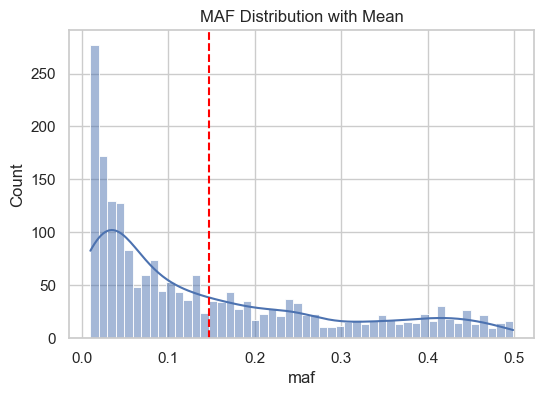

MAF skew: 0.989561013486418
MAF kurtosis: -0.23039578157051555


In [67]:
plt.figure(figsize=(6,4))
sns.histplot(effects["maf"], bins=50, kde=True)
plt.axvline(effects["maf"].mean(), color="red", linestyle="--")
plt.title("MAF Distribution with Mean")
plt.show()

print("MAF skew:", effects["maf"].skew())
print("MAF kurtosis:", effects["maf"].kurt())

In [68]:
from scipy.stats import normaltest

stat, p = normaltest(effects["beta"])
print("Normality test for beta: p =", p)

Normality test for beta: p = 2.784840190363753e-166


Mean |β| causal: 0.04089764865018952
Mean |β| noncausal: 0.0


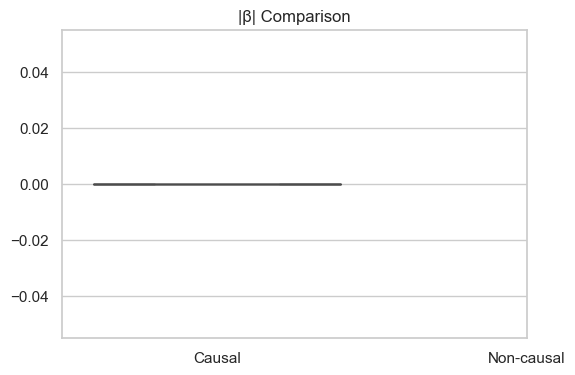

In [69]:
causal = effects[effects["is_causal"]==1]["beta"]
noncausal = effects[effects["is_causal"]==0]["beta"]

print("Mean |β| causal:", np.abs(causal).mean())
print("Mean |β| noncausal:", np.abs(noncausal).mean())

plt.figure(figsize=(6,4))
sns.boxplot(data=[np.abs(causal), np.abs(noncausal)], notch=True)
plt.xticks([0,1], ["Causal", "Non-causal"])
plt.title("|β| Comparison")
plt.show()

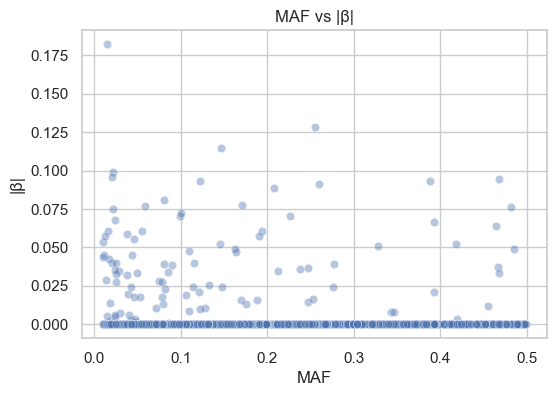

Correlation: 0.010162316011114496


In [70]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="maf", y=np.abs(effects["beta"]), data=effects, alpha=0.4)
plt.title("MAF vs |β|")
plt.xlabel("MAF")
plt.ylabel("|β|")
plt.show()

print("Correlation:", effects["maf"].corr(np.abs(effects["beta"])))

## Checking Both .csv Files

In [71]:
print("PGS mean:", cohort["polygenic_score"].mean())
print("PGS sd:", cohort["polygenic_score"].std())

print("Var(β):", effects["beta"].var())
print("Mean |β|:", effects["beta"].abs().mean())

PGS mean: -7.531752999057062e-17
PGS sd: 0.9999999600661144
Var(β): 0.0001347317074139468
Mean |β|: 0.002051035539126857


If β variance is high → PGS variance should also be high.

If β variance is tiny → PGS should look nearly flat.

In [72]:
num_causal = effects["is_causal"].sum()
total = len(effects)

print(f"Causal variants: {num_causal}/{total} ({num_causal/total:.2%})")

Causal variants: 100/1994 (5.02%)


In [73]:
maf_zero = (effects["maf"] == 0).sum()
maf_one  = (effects["maf"] == 1).sum()

print(f"MAF == 0 count: {maf_zero}")
print(f"MAF == 1 count: {maf_one}")

if maf_zero > 0 or maf_one > 0:
    print("⚠️ WARNING: Impossible MAF values detected. These variants should not appear in real or simulated datasets unless fixed or monomorphic SNPs were included by mistake.")
else:
    print("No impossible MAF values found — OK.")

MAF == 0 count: 0
MAF == 1 count: 0
No impossible MAF values found — OK.
